In [3]:
import os
os.environ['HSA_OVERRIDE_GFX_VERSION'] = '10.3.0'

In [1]:
from pathlib import Path
import os
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
clivePath = Path("/home/mrpaw/Documents/mag_databases/LIVEC_or_CLIVE/ChallengeDB_release/ChallengeDB_release")

cliveDataPath = clivePath / "Data"

AllImages_releasePath = cliveDataPath / "AllImages_release.mat"
AllMOS_releasePath = cliveDataPath / "AllMOS_release.mat"
AllStdDev_release = cliveDataPath / "AllStdDev_release.mat"

In [3]:
allImages =  sio.loadmat(AllImages_releasePath)
AllMOS =  sio.loadmat(AllMOS_releasePath)
AllStdDev =  sio.loadmat(AllStdDev_release)
print(allImages.keys())
print(allImages['AllImages_release'][7:20])
print("len ",len(allImages['AllImages_release']))
print("element 2", allImages['AllImages_release'][2])
print("element 2", allImages['AllImages_release'][2][0][0])
print(AllMOS.keys())
print(AllMOS['AllMOS_release'])
print('mos len ' ,len(AllMOS['AllMOS_release']))
print('mos ' ,len(AllMOS['AllMOS_release'][0]))
print('mos ' ,AllMOS['AllMOS_release'][0])
print(AllStdDev.keys())
print(AllStdDev['AllStdDev_release'])


dict_keys(['__header__', '__version__', '__globals__', 'AllImages_release'])
[[array(['100.bmp'], dtype='<U7')]
 [array(['101.bmp'], dtype='<U7')]
 [array(['102.bmp'], dtype='<U7')]
 [array(['103.bmp'], dtype='<U7')]
 [array(['104.bmp'], dtype='<U7')]
 [array(['105.bmp'], dtype='<U7')]
 [array(['106.bmp'], dtype='<U7')]
 [array(['107.bmp'], dtype='<U7')]
 [array(['108.bmp'], dtype='<U7')]
 [array(['109.bmp'], dtype='<U7')]
 [array(['10.bmp'], dtype='<U6')]
 [array(['110.bmp'], dtype='<U7')]
 [array(['111.bmp'], dtype='<U7')]]
len  1169
element 2 [array(['t3.bmp'], dtype='<U6')]
element 2 t3.bmp
dict_keys(['__header__', '__version__', '__globals__', 'AllMOS_release'])
[[63.96340617 25.33530641 48.93656326 ... 62.66171188 87.06559249
  72.75387093]]
mos len  1
mos  1169
mos  [63.96340617 25.33530641 48.93656326 ... 62.66171188 87.06559249
 72.75387093]
dict_keys(['__header__', '__version__', '__globals__', 'AllStdDev_release'])
[[18.37620007 13.65143147 18.92459579 ... 20.50233596 14.628

In [4]:
indexes = np.arange(len(allImages['AllImages_release']))
i_train, i_test = train_test_split(indexes, test_size=0.2, random_state=21, shuffle=True)
#print(indexes, i_train, i_test, len(i_train), len(i_test)) #jest ok
len(i_train) if False else len(i_test)

234

In [18]:
from torch.utils.data import Dataset
import torch;
from typing import Tuple
from PIL import Image
import matplotlib.pyplot as plt

class CLIVEData(Dataset):
  def __init__(self, path:Path, train:bool, transform:torch.nn.Module = None, testSize = 0.2, normalize = True) -> None:
    super().__init__()
    self.train = train
    self.path = path
    self.dataPath = path / "Data"
    self.imagesPath = path / "Images"
    self.AllImages_Path = self.dataPath / "AllImages_release.mat"
    self.AllMOS_Path = self.dataPath / "AllMOS_release.mat"
    self.AllStdDev_Path = self.dataPath / "AllStdDev_release.mat"
    self.normalize = True

    self.allImages =  sio.loadmat(self.AllImages_Path)
    self.AllMOS =  sio.loadmat(self.AllMOS_Path)
    self.AllStdDev =  sio.loadmat(self.AllStdDev_Path)

    length = len(self.allImages['AllImages_release'])

    #skiping first 7 indexes because those were to train participans
    self.indexes = np.arange(start=7, stop=length) 

    i_train, i_test = train_test_split(self.indexes, test_size=testSize, random_state=21, shuffle=True)

    self.indexes = i_train if train else i_test
    
    self.transform = transform

  def __len__(self):
    return len(self.indexes)  

  def __getitem__(self, index) -> Tuple[torch.Tensor, torch.Tensor]:
    i = self.indexes[index]
    img_path = self.imagesPath / self.allImages["AllImages_release"][i][0][0]
    mos = self.AllMOS["AllMOS_release"][0][i]

    print(img_path)
    img = Image.open(img_path)

    if(self.transform != None):
      img = self.transform(img)

    if(self.normalize):
      mos = mos / 100.0

    mos = torch.tensor(mos)

    return (img, mos)

In [19]:
trainData = CLIVEData(clivePath, True)
testData = CLIVEData(clivePath, False)

/home/mrpaw/Documents/mag_databases/LIVEC_or_CLIVE/ChallengeDB_release/ChallengeDB_release/Images/423.bmp
<class 'torch.Tensor'>
tensor(0.7156, dtype=torch.float64)


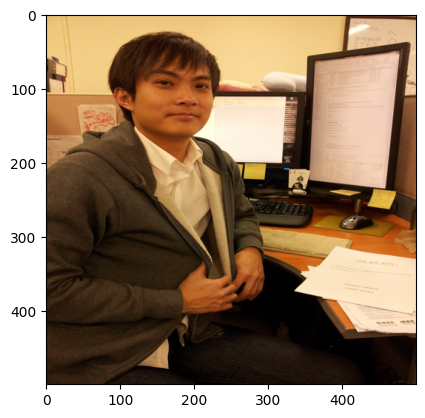

In [20]:
img, mos = trainData[2]
print(type(mos))
print(mos)
plt.imshow(img)